# PORTLAND OREGON CRIME ANALYSES

                                        
Portland is Oregon's largest and most populous city, with the population estimated over half a million. As of late, Portland is best known for its hipster and crunchy behavior, great outdoors, microbreweries, bridges and bicycle paths. Oregon is an in-migration state and Portland leads Oregon's population growth at the rate around 10,000 per year. As this trend is expected to continue for the next five decades, it is worth the effort to explore the crime rate in this city.                             

The current project is aimed to explore the crime rate between 2015 - 2018. The dataset used in this project is found in this [link](https://www.kaggle.com/katzwigmore/portland-oregon-crime-data), which is provided by the City of Portland Police Bureau.


#### Here are the descriptions for some of the columns:

* Occur Month Year - The Month and Year that the incident occured.
* Neighborhood - Neighborhood where incident occurred.
* Crime Against - Crime against category (Person, Property, or Society)
* Offense Type - Type of offense (for example, Aggravated Assault)
* Offense Category - Category of offense (for example, Assault Offenses)
* Offense Count - Number of the offense type to count for the incident.


#### Based on the dataset preview and an understanding of what each column represents, let's start with some motivating questions we want to answer:

  - Which is the more frequently committed crime?
  - Which main subject of crimes (property vs. people vs. society) is most prevalent?
  - What is the crime distributions in wealthy vs. ghetto neighborhoods?
  - What time of the date is a crime more likely being committed? 
  - Is there a seasonal trend to crimes?
  

### Let's first take a look at the data set:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
crimes = pd.read_csv('Portland_OR_Crime_Open_Data_Sheet_data.csv')
crimes.head(5)

,Address,Case Number,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Month Year,Occur Time,Offense Category,Offense Count,Offense Type,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,Report Date,ReportMonthYear
0,3600 BLOCK OF SE KNAPP ST,17-902332,Property,Eastmoreland,1,2/20/2017,2/1/2017,0,Larceny Offenses,1,Theft From Motor Vehicle,45.470545,-122.625298,7656952.0,664817.0,2/20/2017,Feb-17
1,3600 BLOCK OF SE LAMBERT ST,17-902346,Property,Eastmoreland,1,2/20/2017,2/1/2017,30,Larceny Offenses,1,Theft From Motor Vehicle,45.467028,-122.625272,7656925.0,663535.0,2/20/2017,Feb-17
2,7200 BLOCK OF SE 32ND AVE,17-902450,Property,Eastmoreland,1,2/21/2017,2/1/2017,2345,Larceny Offenses,1,Theft From Motor Vehicle,45.471859,-122.630327,7655675.0,665330.0,2/22/2017,Feb-17
3,6500 BLOCK OF SE 32ND AVE,17-902495,Property,Eastmoreland,1,2/21/2017,2/1/2017,2350,Larceny Offenses,1,Theft From Motor Vehicle,45.475196,-122.630444,7655677.0,666547.0,2/22/2017,Feb-17
4,500 BLOCK OF N DIXON ST,17-901848,Property,Eliot,1,12/21/2016,12/1/2016,1330,Larceny Offenses,1,Theft From Motor Vehicle,45.534551,-122.671730,7645672.0,688462.0,2/11/2017,Feb-17


## Data Cleaning 


There are a few columns we don't need to pay attention to and some that might impose challenges to work with. Let's do some housekeeping before moving on to further analyses.

In [3]:
#make a list of unwanted columns
drop_columns = ['Address', 'Case Number', 'Occur Month Year','OpenDataLat', 'OpenDataLon', 'OpenDataX', 'OpenDataY', 'Report Date', 'ReportMonthYear']

#drop unwanted columns from dateframe 
crimes.drop(drop_columns, inplace=True, axis=1)

crimes.dtypes

Crime Against        object
Neighborhood         object
Number of Records     int64
Occur Date           object
Occur Time            int64
Offense Category     object
Offense Count         int64
Offense Type         object
dtype: object

'Occur Time' values are int64. We need to change it into useable data.

In [4]:
#make a function that can turn time values into strings with a desired format
def int_to_strtime(d):
    (h, s) = (d[:2], d[2:])
    timestr = h + ':' + s
    return timestr 

#add zeros to form hhmm
crimes['Occur Time'] = crimes['Occur Time'].apply('{:0>4}'.format) #what does '{:0>4}' mean? 
crimes['Occur Time'] = crimes['Occur Time'].apply(int_to_strtime)
crimes['Time'] = pd.to_datetime(crimes['Occur Time']).dt.hour
crimes.head()

,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Time,Offense Category,Offense Count,Offense Type,Time
0,Property,Eastmoreland,1,2/20/2017,00:00,Larceny Offenses,1,Theft From Motor Vehicle,0
1,Property,Eastmoreland,1,2/20/2017,00:30,Larceny Offenses,1,Theft From Motor Vehicle,0
2,Property,Eastmoreland,1,2/21/2017,23:45,Larceny Offenses,1,Theft From Motor Vehicle,23
3,Property,Eastmoreland,1,2/21/2017,23:50,Larceny Offenses,1,Theft From Motor Vehicle,23
4,Property,Eliot,1,12/21/2016,13:30,Larceny Offenses,1,Theft From Motor Vehicle,13


In [5]:
crimes['Occur Date Time'] = pd.to_datetime(crimes['Occur Date'] + ' ' + crimes['Occur Time'])
crimes.head(3)

,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Time,Offense Category,Offense Count,Offense Type,Time,Occur Date Time
0,Property,Eastmoreland,1,2/20/2017,00:00,Larceny Offenses,1,Theft From Motor Vehicle,0,2017-02-20 00:00:00
1,Property,Eastmoreland,1,2/20/2017,00:30,Larceny Offenses,1,Theft From Motor Vehicle,0,2017-02-20 00:30:00
2,Property,Eastmoreland,1,2/21/2017,23:45,Larceny Offenses,1,Theft From Motor Vehicle,23,2017-02-21 23:45:00


Make new columns named 'Month' and 'Year' to analyze data easier. 

In [6]:
crimes['Occur Date'] = pd.to_datetime(crimes['Occur Date'])
crimes['Year'], crimes['Month'] = crimes['Occur Date'].dt.year, crimes['Occur Date'].dt.month
crimes['Day'] = crimes['Occur Date'].dt.dayofweek #Monday= 0, Sunday=6

crimes.head()

,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Time,Offense Category,Offense Count,Offense Type,Time,Occur Date Time,Year,Month,Day
0,Property,Eastmoreland,1,2017-02-20,00:00,Larceny Offenses,1,Theft From Motor Vehicle,0,2017-02-20 00:00:00,2017,2,0
1,Property,Eastmoreland,1,2017-02-20,00:30,Larceny Offenses,1,Theft From Motor Vehicle,0,2017-02-20 00:30:00,2017,2,0
2,Property,Eastmoreland,1,2017-02-21,23:45,Larceny Offenses,1,Theft From Motor Vehicle,23,2017-02-21 23:45:00,2017,2,1
3,Property,Eastmoreland,1,2017-02-21,23:50,Larceny Offenses,1,Theft From Motor Vehicle,23,2017-02-21 23:50:00,2017,2,1
4,Property,Eliot,1,2016-12-21,13:30,Larceny Offenses,1,Theft From Motor Vehicle,13,2016-12-21 13:30:00,2016,12,2


The dataset author mentions that he is still working on the pre-2015 data because the older format isn't comparable to the newer ones. Let's first take a look at the 'Year' column values: 

In [7]:
crimes['Year'].value_counts()

2017    60486
2016    57542
2018    45014
2015    38739
2014      307
2013      126
2012       80
2011       59
2010       41
2009       27
2008       25
2006       21
2007       15
2005       15
2000        8
2002        7
2004        5
1996        5
1998        5
2001        4
2003        3
1999        2
1995        2
1993        2
1984        2
1977        2
1997        1
1994        1
1992        1
1988        1
1987        1
1980        1
1979        1
1972        1
Name: Year, dtype: int64

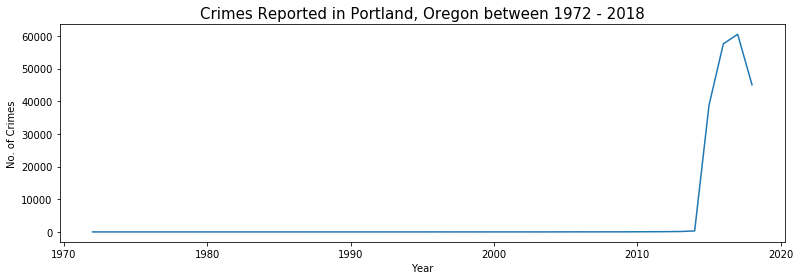

In [8]:
%matplotlib inline
plt.figure(figsize=(13, 4))
plt.plot(crimes['Year'].value_counts().sort_index())
plt.ylabel('No. of Crimes')
plt.xlabel('Year')
plt.title('Crimes Reported in Portland, Oregon between 1972 - 2018', fontsize=15)
plt.show()

Given that there is a sharp drop to the pre-2015 data. We will focus on post-2015 data only and to do that, we will first create a new data frame containing all the values from 2015 to 2017.

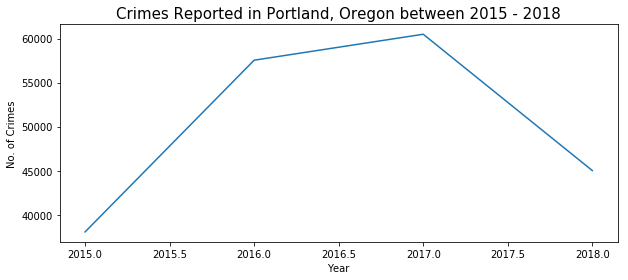

In [9]:
#create a new dataframe containing values between May,2015 - Sept,2018 only
new_year = crimes[crimes['Year'].between(2015, 2018)]
new_year = new_year.set_index('Occur Date')
new_year = new_year['2015-05-01':'2018-09-30']

plt.figure(figsize=(10,4))
plt.plot(new_year['Year'].value_counts().sort_index())
plt.title('Crimes Reported in Portland, Oregon between 2015 - 2018', fontsize=15)
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.show()
#need to figure out why the years being switched to float??? 

In [10]:
new_year['Occur Date Time'].value_counts().sort_index()

2015-05-01 00:00:00    14
2015-05-01 00:01:00     5
2015-05-01 00:08:00     1
2015-05-01 00:10:00     1
2015-05-01 00:30:00     1
2015-05-01 01:00:00     1
2015-05-01 01:10:00     1
2015-05-01 01:15:00     1
2015-05-01 01:52:00     1
2015-05-01 02:12:00     2
2015-05-01 02:15:00     1
2015-05-01 02:57:00     1
2015-05-01 04:19:00     1
2015-05-01 04:22:00     1
2015-05-01 04:30:00     1
2015-05-01 05:00:00     1
2015-05-01 05:45:00     1
2015-05-01 06:00:00     1
2015-05-01 07:00:00     2
2015-05-01 07:10:00     1
2015-05-01 07:15:00     1
2015-05-01 07:40:00     1
2015-05-01 07:50:00     2
2015-05-01 08:00:00     8
2015-05-01 08:35:00     1
2015-05-01 08:45:00     1
2015-05-01 08:50:00     1
2015-05-01 09:00:00     2
2015-05-01 09:19:00     2
2015-05-01 09:25:00     1
                       ..
2018-09-30 14:15:00     1
2018-09-30 14:23:00     1
2018-09-30 15:20:00     1
2018-09-30 16:00:00     1
2018-09-30 16:30:00     2
2018-09-30 16:50:00     1
2018-09-30 16:55:00     1
2018-09-30 1

## Data Analyses


The overall crime rates went up steadily from 2015 to 2017, then dropped by 25% in 2018. Let's take a look at the crime rates by months to see if there is a distinctive season when crimes most likely to happen.

### Crime Distribution over Time

In [11]:
new_year['Month'].value_counts().sort_index()

1     14489
2     13553
3     14728
4     14684
5     19890
6     19440
7     19626
8     19737
9     19248
10    15687
11    14752
12    15262
Name: Month, dtype: int64

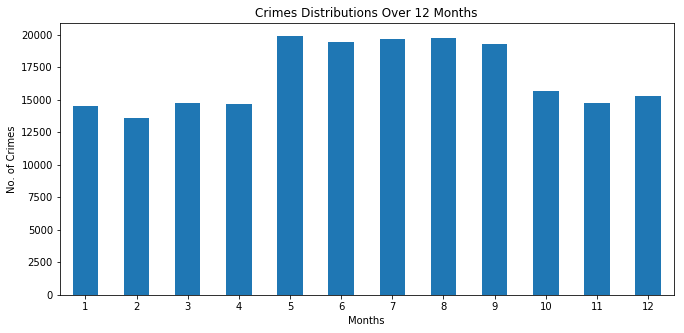

In [12]:
new_year['Month'].value_counts().sort_index().plot(kind='bar', x='Month', title='Crimes Distributions Over 12 Months', figsize=(11,5), rot=0)
plt.xlabel('Months')
plt.ylabel('No. of Crimes')
plt.show()

Crime rates spike in the summer, between May and September. Some researchers reason that increased temperatures- which encourage people to spend more time outdoor and to leave their homes' windows open- and increased daylight hours- which can lengthen the amount of time people spend away from homes- raise the amount of people in pulic and the amount of time that homes are left vacant. Higher temperature also induces discomfort and suffering, making people more aggressive and likely to act out.

There are 3 types of crime subjects: property, society, and person . Let's take a look to see which one is the most prevalent. Since the 'Crime Against' category is a nominal distribution, pie chart will be used:

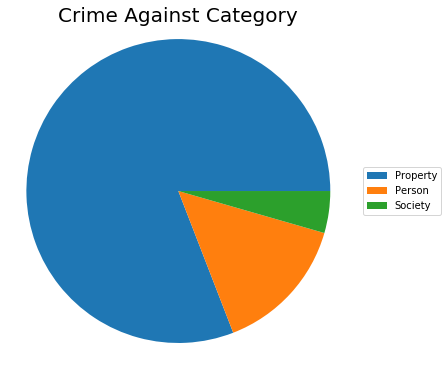

In [13]:
#pie chart

subjects_counts = pd.DataFrame(new_year['Crime Against'].value_counts())
plt.figure(figsize=(6,6))
plt.pie(subjects_counts['Crime Against'])
plt.title('Crime Against Category', fontsize=20)
plt.axis('equal')
plt.legend(subjects_counts.index, bbox_to_anchor=(1.3, 0.5), loc='center right')
plt.show()

There are 3 types of crime subjects: property, society, and person . Let's see which one is the most prevalent. Since the 'Crime Against' category is a nominal distribution, pie chart will be used:

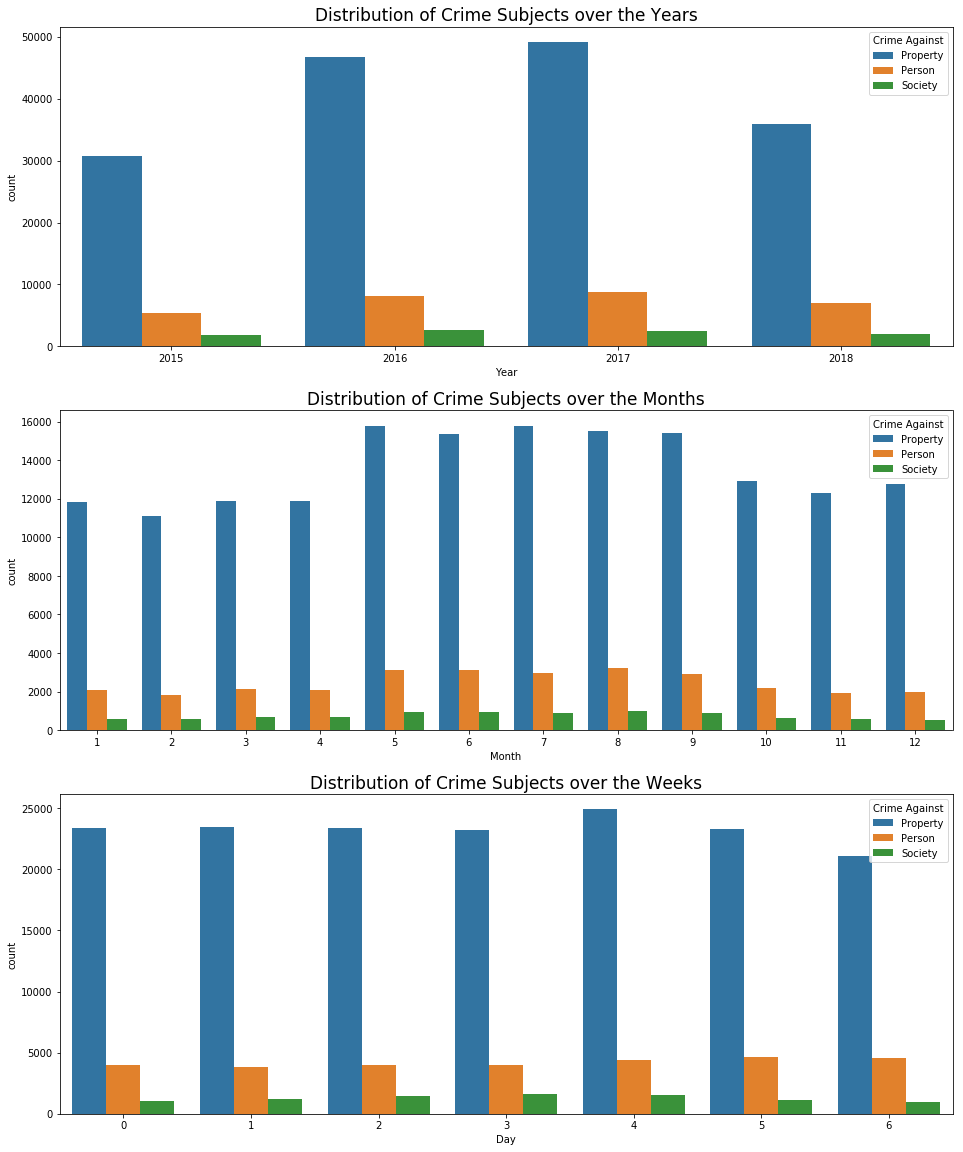

In [14]:
from matplotlib.pyplot import subplot, figure

plt.figure (figsize=(16,20))

#over the years
plt.subplot(3,1,1)
sns.countplot(x=new_year['Year'], hue= new_year['Crime Against'], data=new_year)
plt.xticks(rotation=0)
plt.title('Distribution of Crime Subjects over the Years', fontsize=17)

#over 12 months
plt.subplot(3,1,2)
sns.countplot(x=new_year['Month'], hue= new_year['Crime Against'], data=new_year)
plt.xticks(rotation=0)
plt.title('Distribution of Crime Subjects over the Months', fontsize=17)

#over 7 days of the week, starting with Monday = 0
plt.subplot(3,1,3)
sns.countplot(x=new_year['Day'], hue= new_year['Crime Against'], data=new_year)
plt.xticks(rotation=0)
plt.title('Distribution of Crime Subjects over the Weeks', fontsize=17)

plt.show()

Crime rates went up from 2015 to 2017, then plummeted in 2018. Crime against property, person, and society all increase between May and September, suggesting seasonal patterns in criminal trends. Crime against property is highest on Friday, whereas crime against person on Saturday and crime against society on Thursday.

Overall, crimes against property is approximately 4 times higher than those against person and 16 times higher against society.

### Geographic Distributions of Crimes

Next, I am going to examine the geographic distribution of crimes across the city of Portland.

In [15]:
new_year['Neighborhood'].value_counts(5)

Downtown                0.069392
Hazelwood               0.068188
Lents                   0.038885
Powellhurst-Gilbert     0.038757
Centennial              0.034722
Old Town/Chinatown      0.034040
Northwest               0.031874
Pearl                   0.028161
Montavilla              0.027362
Lloyd                   0.025514
Buckman West            0.022974
Parkrose                0.019368
St Johns                0.019128
Eliot                   0.017105
Kerns                   0.016751
Cully                   0.016203
Richmond                0.015502
Hosford-Abernethy       0.015415
Brentwood-Darlington    0.014022
Mill Park               0.013837
Goose Hollow            0.013755
Sunnyside               0.013069
Foster-Powell           0.012803
Sellwood-Moreland       0.012767
Kenton                  0.012444
Creston-Kenilworth      0.012024
Hayden Island           0.011994
Madison South           0.011948
Portsmouth              0.011661
Buckman East            0.011528
          

Downtown Portland and Hazelwood, which locates in North East Portland, have the highest crime rates. Homelessness, drug trafficking, thievery are big issues in these areas of the city. 

On the other hand, Forest Park, Alameda, Linnton, Southwest Hills, Bridlemile are some of the wealthiest neighborhoods in Portland. Let's take a look at how the distribution of the crime category in wealthy versus ghetto neighborhoods:

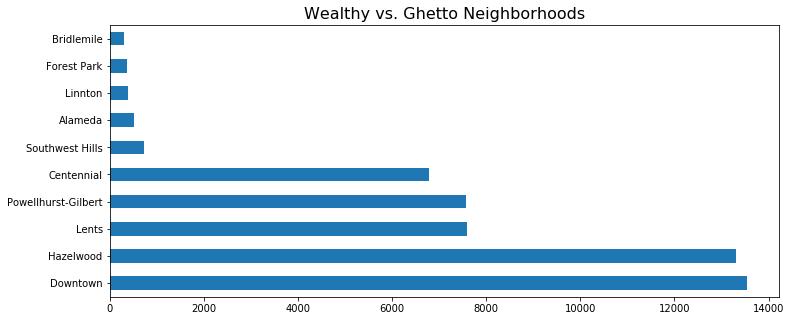

In [16]:
#overall crimes

rich_neighborhoods = ['Forest Park', 'Alameda', 'Linnton', 'Southwest Hills', 'Bridlemile', 'Downtown', 'Lents', 'Hazelwood', 'Powellhurst-Gilbert', 'Centennial' ]
rn = new_year[new_year['Neighborhood'].isin(rich_neighborhoods)]
rn['Neighborhood'].value_counts().plot.barh(figsize=(12,5))
plt.title('Wealthy vs. Ghetto Neighborhoods', fontsize=16)
plt.show()

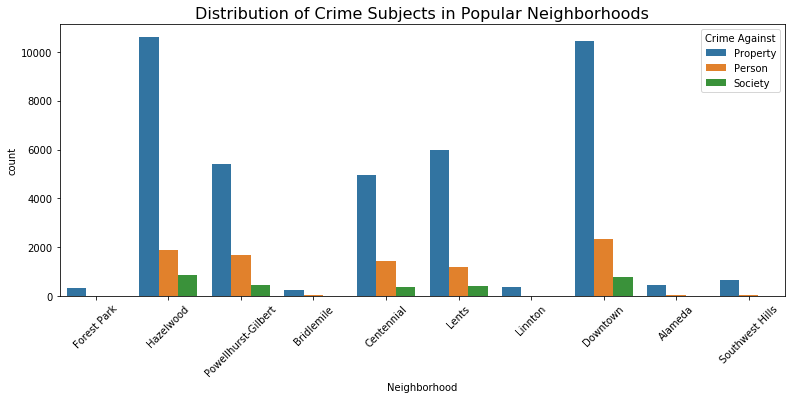

In [17]:
#crime distributions against 3 categorical values

plt.figure(figsize=(13,5))
sns.countplot(x= rn['Neighborhood'], hue= rn['Crime Against'], data=rn)
plt.xticks(rotation=45)
plt.title('Distribution of Crime Subjects in Popular Neighborhoods', fontsize=16)
plt.show()

Crime is much more prevalent in poor inner-city neighborhoods than in better off suburbs. Researchers have suggested that the possibility of more lucrative targets in affluent neighborhoods may be offset by the relative risk associated with their acquisition. There are a number of factors that discourage targetting wealthy neighborhoods:

  * First, economic segregation means that affluent neighborhoods may be further away.
  
  * Second, they are also likely to be more socially connected.
  
  * Third, ethnically diverse neighborhoods may be attractive targets because the lack of an overarching social identity provides anonymity for burglars unfamiliar with these norms.
  
  * Fourth, wealthy people can afford advanced security technology to protect their homes
  
  
### Most Common Crimes

Next, let's examine the distribution of the 'Offense Category' and 'Offense Type' to see what is the most common crime:

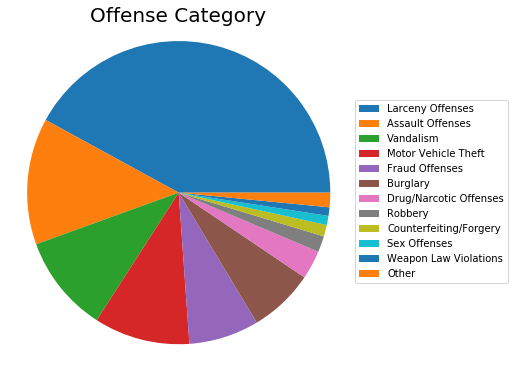

In [18]:
#new_year['Offense Category'].describe()
offenses = []
offenses = pd.DataFrame(offenses, columns=['offense'])
offenses['offense'] = new_year['Offense Category']

# Create numeric counts
assault_counts = pd.DataFrame(offenses.offense.value_counts())
other = int(assault_counts[11:].sum())
assault_counts = assault_counts[:11]
assault_counts.loc['Other'] = other

#Generate Pie Chart
plt.figure(figsize=(6,6))
plt.pie(assault_counts.offense)
plt.axis('equal')
plt.title('Offense Category', fontsize=20)
plt.legend(assault_counts.index, bbox_to_anchor=(1.5, 0.5), loc="center right")
plt.show()

Larceny represents more than 40% of the offense category. Of the larceny offense category, which type is most likely being committed. 

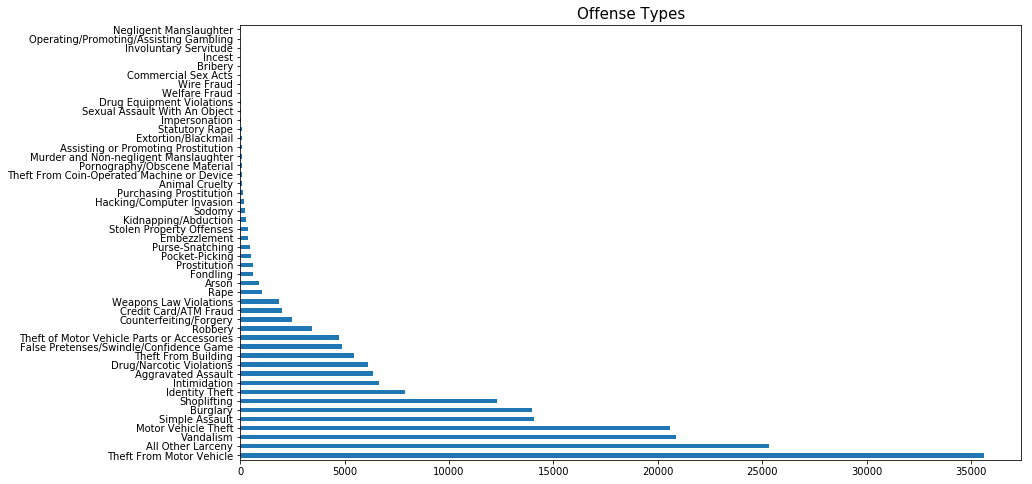

In [19]:
new_year['Offense Type'].value_counts().plot.barh(figsize=(14,8))
plt.title('Offense Types', fontsize=15)
plt.show()

Property crimes are by far the most reported crimes. And among all the types of property crimes, theft from motor vehicle is the most common crime. We need to be careful of where to park our cars in Portland.

Next we are going to look at "motor vehicle theft" crime's trend between 2015 - 2018:

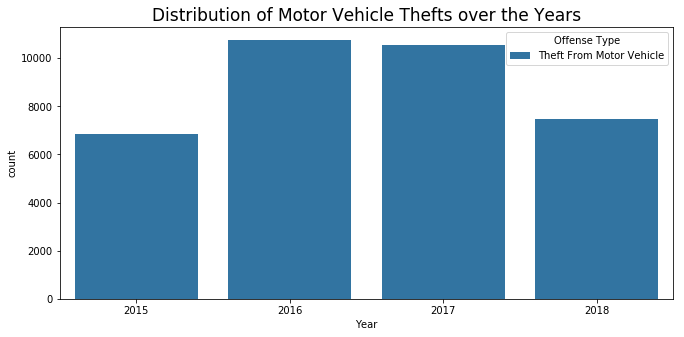

In [20]:
motor_theft = new_year[new_year['Offense Type'] == 'Theft From Motor Vehicle']

plt.figure(figsize=(11,5))
sns.countplot(x=motor_theft['Year'], hue= motor_theft['Offense Type'], data=motor_theft)
plt.xticks(rotation=0)
plt.title('Distribution of Motor Vehicle Thefts over the Years', fontsize=17)
plt.show()


Motor vehicle thefts increased in 2016 and 2017, but decreased by approximately 30% in 2018. One possible explaination is due the rise of 'smart key' technology, which prevents a car's engine from starting unless it recognizes a computer chip embedded within a key or a keyless start key fob, making cars harder to break into.

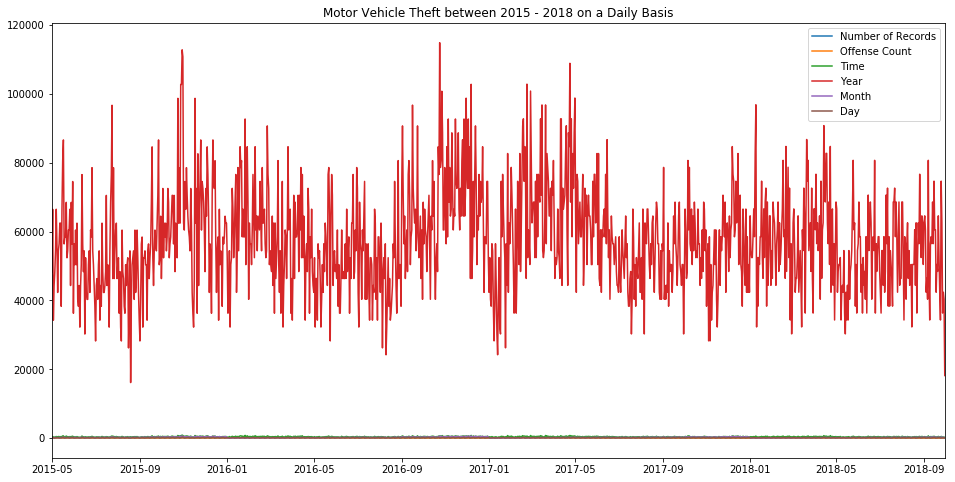

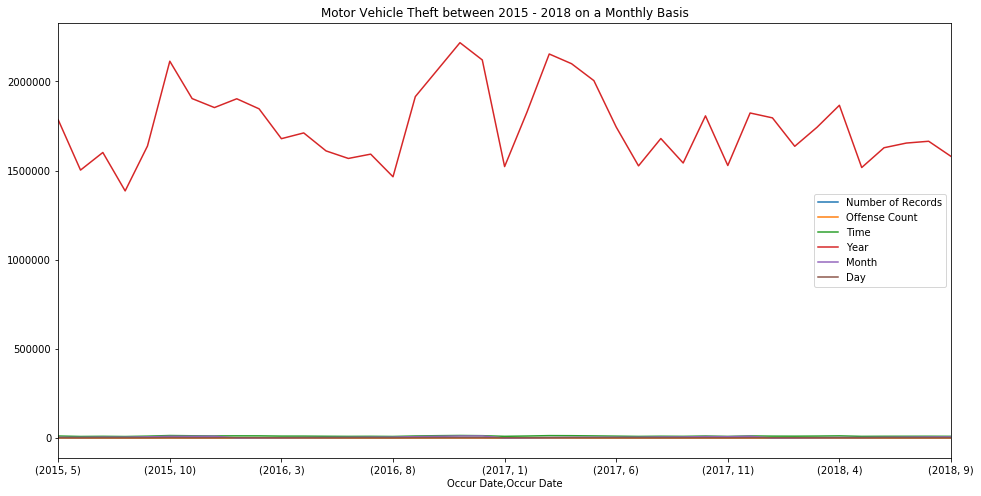

In [21]:
#Group by dates
motor_theft.groupby(motor_theft.index.date).sum().plot(figsize=(16,8), title='Motor Vehicle Theft between 2015 - 2018 on a Daily Basis')
#Group by months
motor_theft.groupby([(motor_theft.index.year), (motor_theft.index.month)]).sum().plot(figsize=(16,8), title='Motor Vehicle Theft between 2015 - 2018 on a Monthly Basis')

plt.show()

Calculate the difference by the weeks over the 4 years period and by the months over the 4 years period.

TypeError: title() missing 1 required positional argument: 'label'

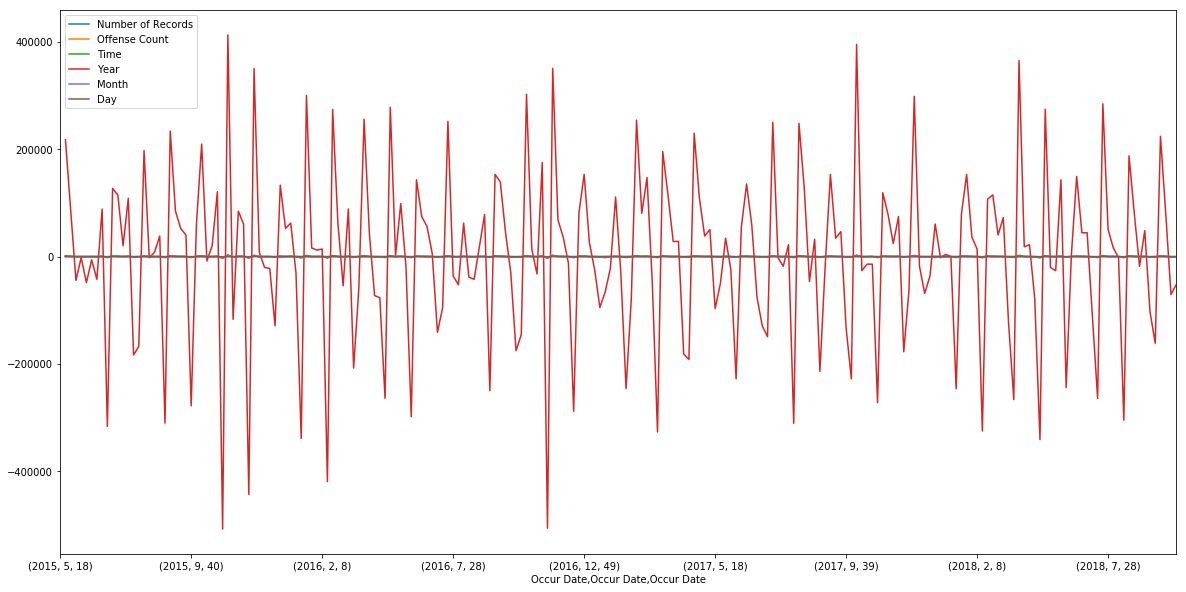

In [22]:
#Difference by the weeks
motor_theft2 = motor_theft.groupby([(motor_theft.index.year), (motor_theft.index.month), (motor_theft.index.week)]).sum()
motor_theft2.diff().plot(figsize=(20,10))
plt.title()

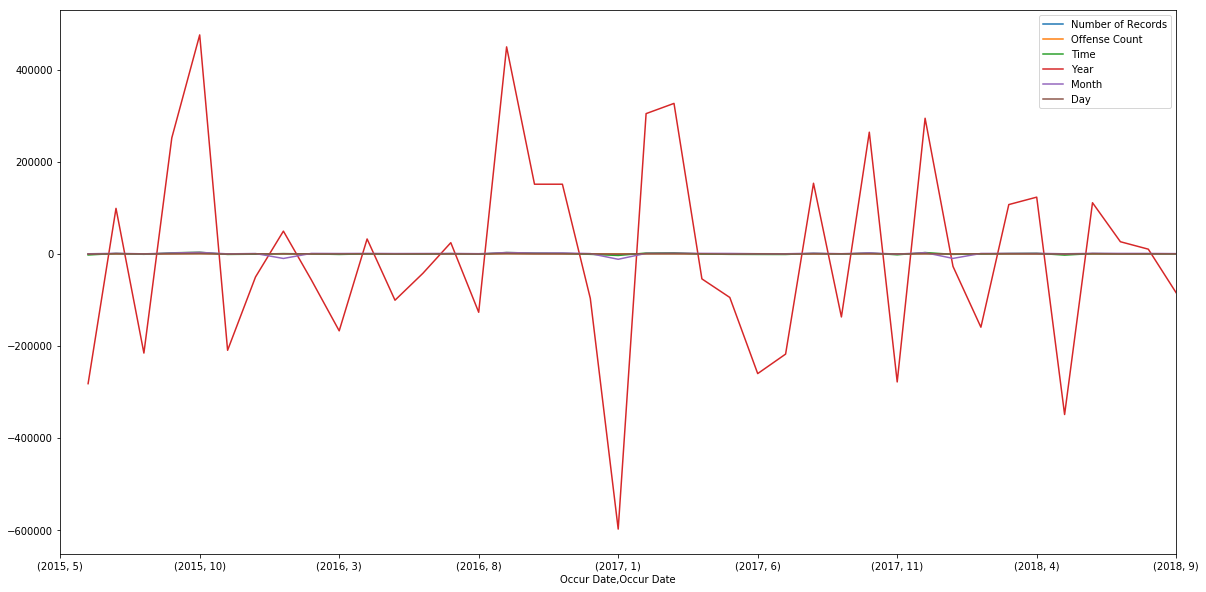

In [23]:
#Difference by the months
motor_theft3 = motor_theft.groupby([(motor_theft.index.year), (motor_theft.index.month)]).sum()
motor_theft3.diff().plot(figsize=(20,10))

There were a few spikes but the overall trend looks flat. If we examine the events happened around some of the spiked days, for example, Oct.31, 2015, which was a Saturday and also Halloween. Children already started going trick-or-treating the night before, young students and professionals attending parties, the streets became more crowded with cars, families, youngsters than normal, creating a good opportunities for car thefts to happen. 

Another spike occured on October 24th, 2016. The day before was the last day of Portland Brewpublic Beer Week. Portlanders love their beer culture, and beer festivals in general are well-received by locals. Granted that people were more likely to take public transportations to attend beer festivals, the sheer amount of attendees contributed to the crowdedness of Portland, allowing more chances for car thievery.


Let's take a quick look at how motor vehicle thefts distributed over the days of the week.

Text(0.5, 1.0, 'Motor Theft Distributions by Days of the Weeks')

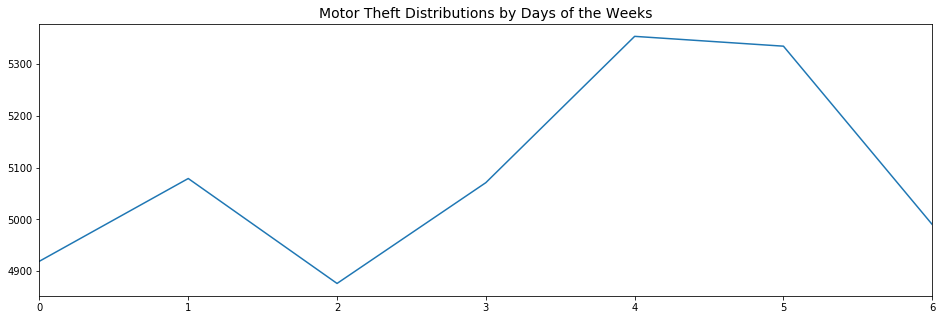

In [24]:
#crime distribution by days of the week
motor_theft['Day'].value_counts().sort_index().plot(figsize=(16,5))
plt.title('Motor Theft Distributions by Days of the Weeks', fontsize=14)


Vehicle thefts spike on Friday, decrease a little bit on Saturday, then dip sharply by Sunday. One possible reason is that people travel more on Friday, especially Friday night, and Saturday, so their cars are more likely to be stolen or broken in on those two days. We need to be extra careful where we park our cars on weekends. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
motor_theft2.index.value_counts().reshape(-1,1)
scaled_values = scaler.fit_transform(motor_theft2) 
motor_theft2.loc[:,:] = scaled_values
motor_theft2.plot(figsize=(14,5))
plt.title('Normalized Motor Vehicle Theft between 2015 - 2018', fontsize=14)

In [ ]:
compare = pd.DataFrame(rn.groupby('Neighborhood').Neighborhood.count())
compare = compare.rename({'Neighborhood':'crime_count'}, axis='columns')
heatmap1 = pd.pivot_table(compare, values= 'crime_count', index=['Neighborhood'])
sns.heatmap(heatmap1, cmap='YlGnBu')
plt.show()
#rn1 = compare.to_dict()
# heatmap1 = pd.pivot_table(compare, index=['Neighborhood'], columns='Neighborhood')
# sns.heatmap(heatmap1, cmap='YlGnBu')
#compare = rn.set_index('Neighborhood')
# rn1 = rn['Neighborhood'].index.value_counts()
# rn2 = rn1.to_dict()
# compare['crime_count'] = rn['Neighborhood'].index.map(rn2)
# compare.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap1 = pd.pivot_table(motor_theft, values='mt_count', index=['Neighborhood'], columns='Year')
sns.heatmap(heatmap1, cmap='YlGnBu')



## Conclusion:

Portland is a safe city for the most part, but that does not mean we should let your guard down, especially during the hot seasons between May and September. Common sense dictates we should not leave our personal belongings in view in a locked car.

Some areas to be vigilant include: Downtown, Hazelwood, Lents, Powellhurst-Gilbert, Centennial.